In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

In [3]:
col = ['CARDNO','TIERNAME','GENDER','MARITALSTATUS','AGEBANDS','DEWALI_BUYER','PENDANT_PENETRATION_LFT','FRAME_PENETRATION_LFT','STUD_PENETRATION_LFT','FT_PENETRATION_LFT','INARA_PENETRATION_LFT','DIAMOND_PENETRATION_LFT','BOUGHT_ON_BDAY_LFT','BOUGHT_ON_ANNIVERSARY_LFT','BOUGHT_IN_FTD_ACTIVATION','NEARST_OCCASION_WIHTIN_3_MONTHS','VINTAGE','RECENCY','PREMIUM_BUYER_TAG','TOT_EARN_PNTS','TOT_REDEM_PTS','PURPLE_PENETRATION','RAGA_PENETRATION','SONATA_PENETRATION','OCTANE_PENETRATION','XYLUS_PENETRATION','NEBULA_PENETRATION','SPEC_PENETRATION','RESPONDERS_REVENUE','RESPONDERS_BILLS_GENERATED','REVENUE_2016','QTY_2016','CATEGORY_2016','GROSSAMOUNT_2016','PPI_2016','DISCOUNT_2016','REVENUE_EP_2016','QTY_EP_2016','CATEGORY_EP_2016','GROSSAMOUNT_EP_2016','PPI_EP_2016','DISCOUNT_EP_2016','REVENUE_WAT_2016','QTY_WAT_2016','CATEGORY_WAT_2016','GROSSAMOUNT_WAT_2016','PPI_WAT_2016','DISCOUNT_WAT_2016','REVENUE_FT_2016','QTY_FT_2016','CATEGORY_FT_2016','GROSSAMOUNT_FT_2016','PPI_FT_2016','DISCOUNT_FT_2016','EP_TAG','FT_TAG','WAT_TAG','JEW_TAG','ACTIVE_TAG','REVENUE_JEW_2016','QTY_JEW_2016','CATEGORY_JEW_2016','GROSSAMOUNT_JEW_2016','PPI_JEW_2016','DISCOUNT_JEW_2016','CITY_TIER','COUNT_STORE_VISIT_LFT','PENDANT_REV','STUD_REV','INARA_REV','DIAMOND_REV','PENDANT_REV_FRAC','STUD_REV_FRAC','INARA_REV_FRAC','DIAMOND_REV_FRAC','SONATA_REV','SONATA_REV_FRAC','NEBULA_REV','NEBULA_REV_FRAC','OCTANE_REV','OCTANE_REV_FRAC','PURPLE_REV','PURPLE_REV_FRAC','RAGA_REV','RAGA_REV_FRAC','FRAME_REV','FRAME_REV_FRAC','SPECTACLE_REV','SPECTACLE_REV_FRAC','EP_REV','EP_REV_FRAC','KARAT_18_22_BUYER','DORMANCY_BANDS','VALID_EMAIL_TAG_F','REV_FRACTION_PG','COIN_REV','CITIES_VISITED','DISTINCT_CFA','WATCHES_REGALIA_QTY','WATCHES_RAG_QTY','AT_RATIO','PG_BUYER_TAG','STUDDED_BUYER_TAG','COINS_BUYER_TAG','EDGE_BUYER_TAG','FK_BUYER_TAG','KARISHMA_BUYER_TAG','SKINN_BUYER_TAG','JUXT_BUYER_TAG','REGALIA_BUYER_TAG','SOLITAIRE_BUYER_TAG','MIA_BUYER_TAG','ZYRA_BUYER_TAG','HIGH_VALUE_STUDDED_BUYER_TAG','BOUGHT_CORE_TAG']
sel = ['CARDNO','TIERNAME','GENDER','MARITALSTATUS','AGEBANDS','DEWALI_BUYER','FRAME_PENETRATION_LFT','FT_PENETRATION_LFT','BOUGHT_ON_BDAY_LFT','BOUGHT_ON_ANNIVERSARY_LFT','BOUGHT_IN_FTD_ACTIVATION','RECENCY','PREMIUM_BUYER_TAG','TOT_EARN_PNTS','TOT_REDEM_PTS','SPEC_PENETRATION','RESPONDERS_REVENUE','RESPONDERS_BILLS_GENERATED','REVENUE_2016','QTY_2016','CATEGORY_2016','GROSSAMOUNT_2016','PPI_2016','DISCOUNT_2016','FT_TAG']

In [4]:
df = pd.read_csv('activesingle.csv', sep= '|', nrows=100000, names= col, usecols=sel, na_values= 0, )
df.fillna(0, inplace=True)
df.head()

,CARDNO,TIERNAME,GENDER,MARITALSTATUS,AGEBANDS,DEWALI_BUYER,FRAME_PENETRATION_LFT,FT_PENETRATION_LFT,BOUGHT_ON_BDAY_LFT,BOUGHT_ON_ANNIVERSARY_LFT,BOUGHT_IN_FTD_ACTIVATION,RECENCY,PREMIUM_BUYER_TAG,TOT_EARN_PNTS,TOT_REDEM_PTS,SPEC_PENETRATION,RESPONDERS_REVENUE,RESPONDERS_BILLS_GENERATED,REVENUE_2016,QTY_2016,CATEGORY_2016,GROSSAMOUNT_2016,PPI_2016,DISCOUNT_2016,FT_TAG
0,700107467081,S,0,0,0,0.0,0.0,0.500000,0.0,0.0,0.0,68,N,73.72,0.0,0.0,0.0,1.0,24574.63,1.0,1,24575.0,24574.63,0.0,0.0
1,700110158321,S,0,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,25,N,0.00,0.0,0.0,0.0,1.0,2487.60,1.0,1,13686.0,2487.60,0.0,0.0
2,700048364843,S,0,0,0,1.0,0.0,0.500000,0.0,0.0,0.0,119,N,28.67,0.0,0.0,0.0,1.0,819.17,1.0,1,4863.0,819.17,0.0,0.0
3,700117049838,S,0,0,0,1.0,0.0,0.500000,0.0,0.0,0.0,25,N,0.00,0.0,0.0,0.0,1.0,3036.08,1.0,1,16695.0,3036.08,0.0,0.0
4,700071259480,S,0,0,0,1.0,0.0,0.166667,0.0,0.0,0.0,323,N,0.00,0.0,0.0,0.0,1.0,4680.35,5.0,1,105765.0,936.07,0.0,0.0


### EXPLORATORY DATA ANALYSIS

In [76]:
categorical_variables = list(df.dtypes[df.dtypes == "object"].index)
df[categorical_variables].describe()

,TIERNAME,GENDER,MARITALSTATUS,AGEBANDS,PREMIUM_BUYER_TAG
count,100000,54318,25949,40544,100000
unique,4,2,2,5,2
top,S,Male,Married,18 -30,N
freq,89349,40316,16880,18437,91680


In [98]:
df.loc[df.FT_TAG == 1, 'FT_TAG'] = 'Bought'
df.loc[df.FT_TAG == 0, 'FT_TAG'] = 'Not Bought'

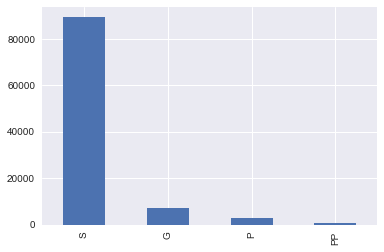

In [104]:
df.TIERNAME.value_counts().plot(kind='bar')

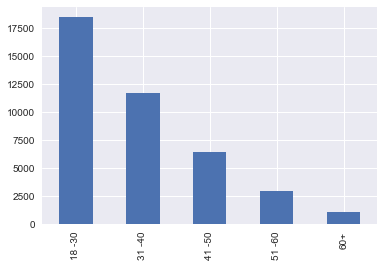

In [105]:
df.AGEBANDS.value_counts().plot(kind='bar')

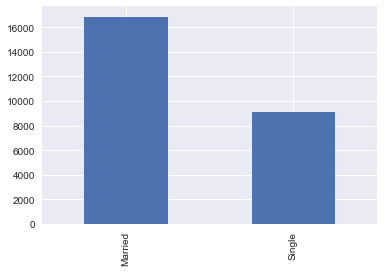

In [106]:
df.MARITALSTATUS.value_counts().plot(kind='bar')

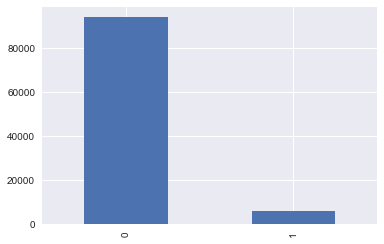

In [108]:
df.DEWALI_BUYER.value_counts().plot(kind='bar')

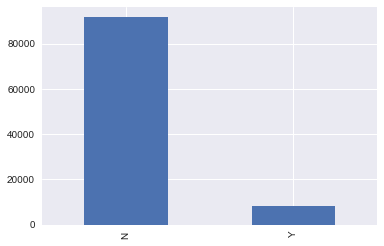

In [109]:
df.PREMIUM_BUYER_TAG.value_counts().plot(kind='bar')

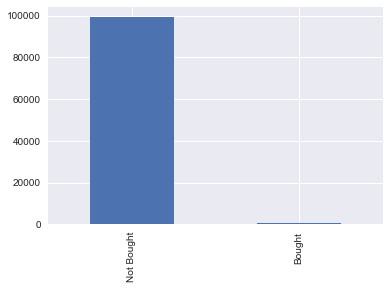

In [110]:
df.FT_TAG.value_counts().plot(kind='bar')

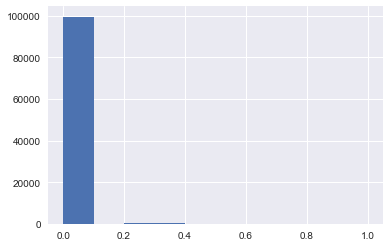

In [118]:
df.FRAME_PENETRATION_LFT.hist()

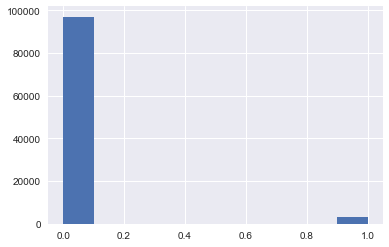

In [119]:
df.BOUGHT_ON_BDAY_LFT.hist()

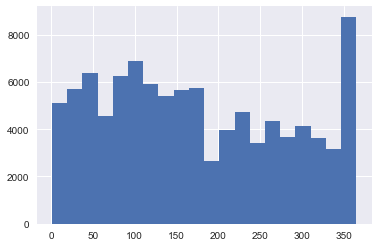

In [126]:
df.RECENCY.hist(bins=20)

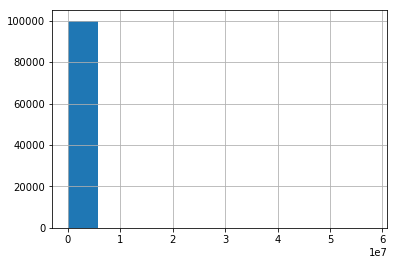

In [4]:
df.TOT_EARN_PNTS.hist()

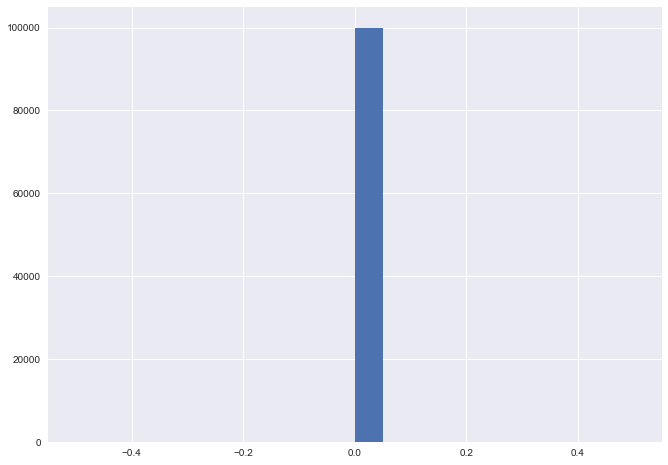

In [109]:
df.TOT_REDEM_PTS.hist(bins=20)

In [4]:
num_variables = list(df.dtypes[df.dtypes != "object"].index)
num_variables = num_variables[2:-1]
num_variables.pop(7)
num_variables.pop(10)
num_variables.pop(-2)
num_variables

['FRAME_PENETRATION_LFT',
 'FT_PENETRATION_LFT',
 'BOUGHT_ON_BDAY_LFT',
 'BOUGHT_ON_ANNIVERSARY_LFT',
 'BOUGHT_IN_FTD_ACTIVATION',
 'RECENCY',
 'TOT_EARN_PNTS',
 'SPEC_PENETRATION',
 'RESPONDERS_REVENUE',
 'RESPONDERS_BILLS_GENERATED',
 'QTY_2016',
 'CATEGORY_2016',
 'GROSSAMOUNT_2016',
 'DISCOUNT_2016']

In [ ]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 11,8

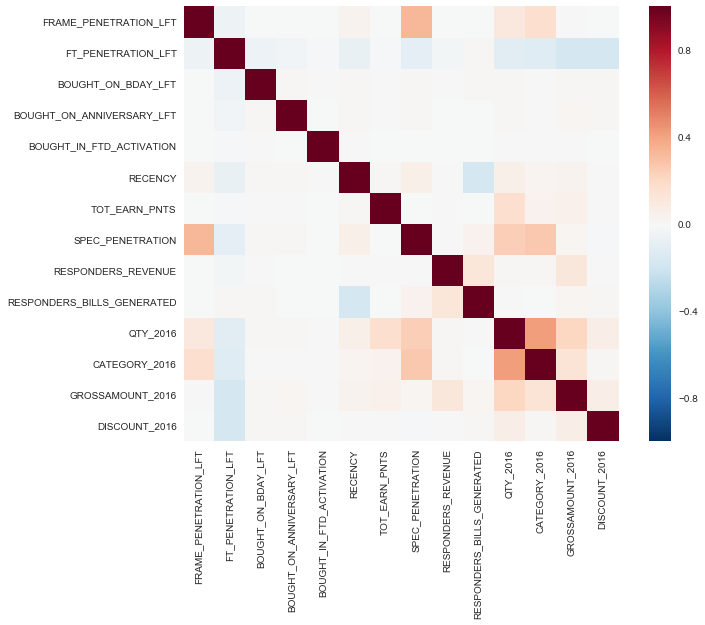

In [58]:
corrmat = df[num_variables].corr()
sns.heatmap(corrmat, square=True)

### MODELLING

In [5]:
cleanup_nums = {"TIERNAME": {"R":0 , "S": 1, "G": 2, "P": 3, "PP": 4},
                "GENDER":   {"Male": 1, "Female": 2},
                "MARITALSTATUS":     {"Married": 4, "Single": 2},
                "PREMIUM_BUYER_TAG":     {"N": 4, "Y": 2},
                "AGEBANDS": {"18 -30": 1, 
                             "31 -40": 2, 
                             "41 -50": 3, 
                             "51 -60": 4,
                                  "60+": 5 }}

df.replace(cleanup_nums, inplace= True)

In [6]:
noncorr= ['FT_PENETRATION_LFT',
 'BOUGHT_ON_BDAY_LFT',
 'BOUGHT_ON_ANNIVERSARY_LFT',
 'BOUGHT_IN_FTD_ACTIVATION',
 'RECENCY',
 'SPEC_PENETRATION',
 'RESPONDERS_REVENUE',
 'RESPONDERS_BILLS_GENERATED',
 'QTY_2016',
 'CATEGORY_2016',
 'GROSSAMOUNT_2016',
 'DISCOUNT_2016']

In [7]:
df.info()
# ALL VARIABLES SHOULD BE NUMERIC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
CARDNO                        100000 non-null int64
TIERNAME                      100000 non-null int64
GENDER                        100000 non-null int64
MARITALSTATUS                 100000 non-null int64
AGEBANDS                      100000 non-null int64
DEWALI_BUYER                  100000 non-null float64
FRAME_PENETRATION_LFT         100000 non-null float64
FT_PENETRATION_LFT            100000 non-null float64
BOUGHT_ON_BDAY_LFT            100000 non-null float64
BOUGHT_ON_ANNIVERSARY_LFT     100000 non-null float64
BOUGHT_IN_FTD_ACTIVATION      100000 non-null float64
RECENCY                       100000 non-null int64
PREMIUM_BUYER_TAG             100000 non-null int64
TOT_EARN_PNTS                 100000 non-null float64
TOT_REDEM_PTS                 100000 non-null float64
SPEC_PENETRATION              100000 non-null float64
RESPONDERS_REVENUE            100000 non

In [8]:
IV = ['TIERNAME', 'GENDER', 'MARITALSTATUS', 'PREMIUM_BUYER_TAG', 'AGEBANDS'] + noncorr
IV

['TIERNAME',
 'GENDER',
 'MARITALSTATUS',
 'PREMIUM_BUYER_TAG',
 'AGEBANDS',
 'FT_PENETRATION_LFT',
 'BOUGHT_ON_BDAY_LFT',
 'BOUGHT_ON_ANNIVERSARY_LFT',
 'BOUGHT_IN_FTD_ACTIVATION',
 'RECENCY',
 'SPEC_PENETRATION',
 'RESPONDERS_REVENUE',
 'RESPONDERS_BILLS_GENERATED',
 'QTY_2016',
 'CATEGORY_2016',
 'GROSSAMOUNT_2016',
 'DISCOUNT_2016']

In [9]:
train_features = df[IV]
train_labels = df.FT_TAG

### Feature Scaling 

In [10]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(train_features)
train_features = std_scale.transform(train_features)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.40, random_state=42)
print(X_train.shape)
print(X_test.shape)

(60000, 17)
(40000, 17)


### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
print("R^2 on training set: %f" % lr.score(X_train, y_train))
print("R^2 on testing set: %f" % lr.score(X_test, y_test))

R^2 on training set: 0.991850
R^2 on testing set: 0.992200


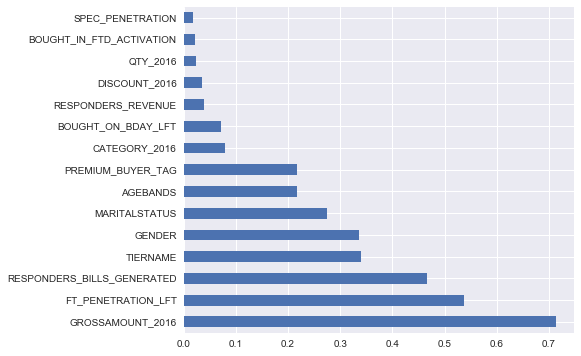

In [18]:
feature_importances = pd.Series(lr.coef_.ravel(), index=IV)
feature_importances = feature_importances.abs().sort_values(ascending=False)
feature_importances[:15].plot(kind="barh", figsize=(7,6));

Receiver operating characteristic - Area Under Curve: 0.70


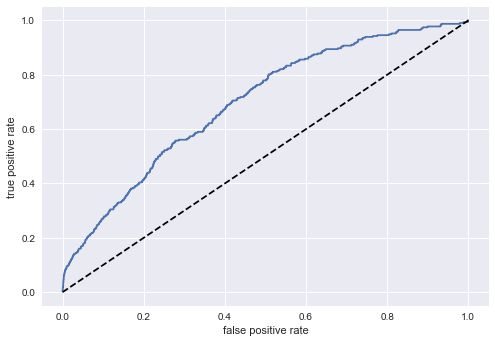

In [19]:
### ROC CURVE
from sklearn.metrics import roc_curve, roc_auc_score, auc

decision_function = lr.decision_function(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, decision_function)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

auc = roc_auc_score(y_test, lr.decision_function(X_test))
print('Receiver operating characteristic - Area Under Curve: %0.2f' % auc)

### Random Forest 

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [73]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[3, 4, 5]}

clf_grid = grid_search.GridSearchCV(rf, parameters)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [74]:
clf_grid.score(X_test, y_test)

0.99150000000000005

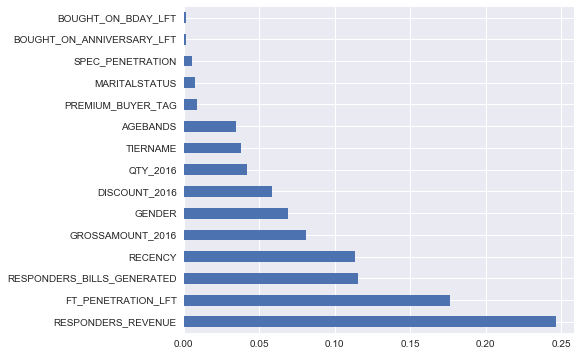

In [78]:
feature_importances = pd.Series(clf_grid.best_estimator_.feature_importances_, index=IV)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances[:15].plot(kind="barh", figsize=(7,6));

Receiver operating characteristic - Area Under Curve: 0.80


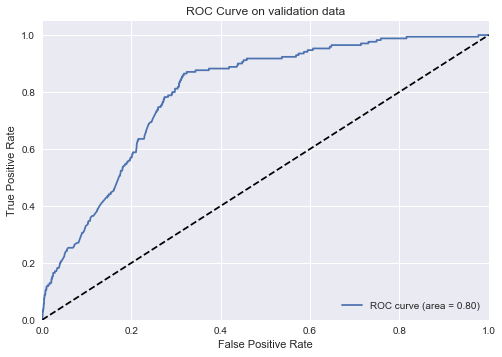

In [88]:
# dont forget to import roc_curve and auc funcitons

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test.values, clf_grid.best_estimator_.predict_proba(X_test)[:,1])

roc_auc = auc(fpr, tpr)
print('Receiver operating characteristic - Area Under Curve: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on validation data')
plt.legend(loc="lower right")
plt.show()

## XG-Boost

In [89]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [90]:
xgdmat = xgb.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [91]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 100)

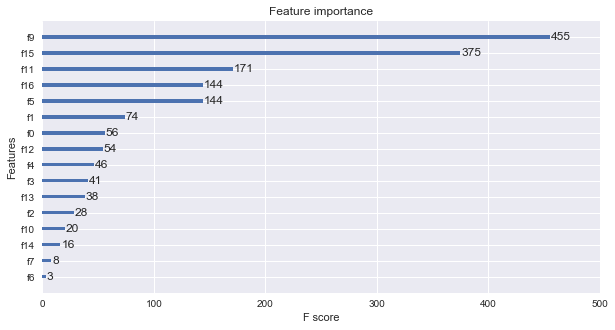

In [92]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,5

xgb.plot_importance(final_gb)

In [93]:
testdmat = xgb.DMatrix(X_test)
y_pred = final_gb.predict(testdmat)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0


print('Accuracy is ', accuracy_score(y_pred, y_test))
print('Error rate is ', 1- accuracy_score(y_pred, y_test))

Accuracy is  0.99125
Error rate is  0.00875


Receiver operating characteristic - Area Under Curve: 0.81


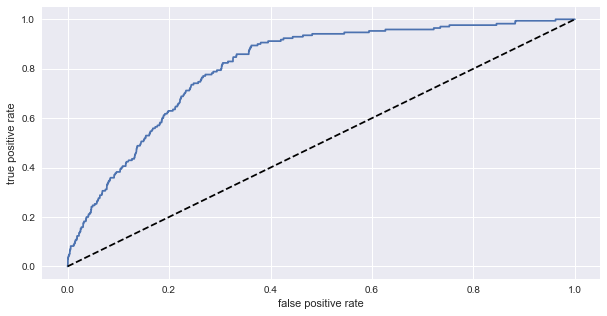

In [94]:
# ROC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, final_gb.predict(testdmat))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

auc = roc_auc_score(y_test, final_gb.predict(testdmat))
print('Receiver operating characteristic - Area Under Curve: %0.2f' % auc)

In [80]:
# CLASSIFICATIN REPORT

print(classification_report(y_test, y_pred, target_names=["Not Bought", "Bought Again"]))

              precision    recall  f1-score   support

  Not Bought       0.99      1.00      0.99    395235
Bought Again       0.50      0.06      0.10      4765

 avg / total       0.98      0.99      0.98    400000



In [74]:
# Validation

y_test.value_counts()

0.0    395235
1.0      4765
Name: FT_TAG, dtype: int64

In [75]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[395156     79]
 [  4651    114]]


## Support Vector Machine Algorithm

In [12]:
from sklearn.svm import LinearSVC

In [95]:
linear_svc = LinearSVC(loss="hinge").fit(X_train, y_train)
svc = SVC(kernel="linear").fit(X_train, y_train)

In [ ]:
np.mean(linear_svc.predict(X_test) == svc.predict(X_test))

In [96]:
svc.score(X_test, y_test)

0.99150000000000005

Receiver operating characteristic - Area Under Curve: 0.64


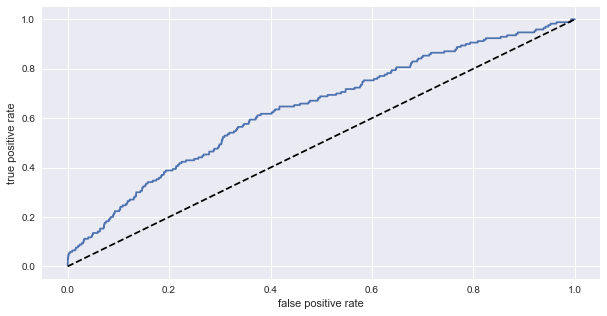

In [97]:
# ROC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  svc.decision_function(X_test))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('Receiver operating characteristic - Area Under Curve: %0.2f' % auc)

##  SVM  Radial Basis Function (RBF) kernel

In [12]:
from sklearn.svm import SVC

In [13]:
rbf_svc = SVC(kernel='rbf').fit(X_train, y_train)

In [14]:
rbf_svc.score(X_test, y_test)

0.99219999999999997

Receiver operating characteristic - Area Under Curve: 0.59


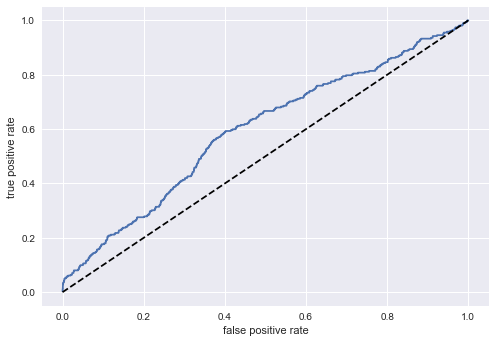

In [15]:
# ROC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  rbf_svc.decision_function(X_test))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

auc = roc_auc_score(y_test, rbf_svc.decision_function(X_test))
print('Receiver operating characteristic - Area Under Curve: %0.2f' % auc)